In [1]:
#Importo las librerias que voy a usar
import pandas as pd 
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns

In [7]:
# Leo el df
df=pd.read_csv("./final_data.csv")
df.head(2)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


In [8]:
df.team.unique()

array(['Manchester United', 'West Ham United', 'Leicester City',
       'Aston Villa', 'Wolverhampton Wanderers', 'Southampton FC',
       'Brighton &amp; Hove Albion', 'Everton FC', 'Nottingham Forest',
       'Leeds United', 'Crystal Palace', 'Fulham FC', 'AFC Bournemouth',
       'Brentford FC', 'Liverpool FC', 'Newcastle United',
       'Manchester City', 'Arsenal FC', 'Tottenham Hotspur', 'Chelsea FC',
       'Borussia Mönchengladbach', 'VfL Wolfsburg', 'TSG 1899 Hoffenheim',
       '1.FC Union Berlin', 'FC Augsburg', 'VfB Stuttgart',
       '1.FSV Mainz 05', '1.FC Köln', 'Hertha BSC', 'FC Schalke 04',
       'VfL Bochum', 'SV Werder Bremen', 'Eintracht Frankfurt',
       'SC Freiburg', 'Borussia Dortmund', 'Bayer 04 Leverkusen',
       'Bayern Munich', 'RB Leipzig', 'Real Sociedad', 'Villarreal CF',
       'Real Betis Balompié', 'Athletic Bilbao', 'Valencia CF',
       'Sevilla FC', 'Celta de Vigo', 'CA Osasuna', 'Girona FC',
       'Rayo Vallecano', 'RCD Mallorca', 'UD Almería',

In [4]:
# Renombro las columnas
df = df.rename(columns={
    'player': 'Jugador',
    'team': 'Equipo',
    'name': 'Nombre',
    'position': 'Posicion',
    'height': 'Altura',
    'age': 'Edad',
    'appearance': 'Apariciones',
    'goals': 'Goles',
    'assists': 'Asistencias',
    'yellow cards': 'Tarjetas Amarillas',
    'second yellow cards': '2da Tarjeta Amarillas',
    'red cards': 'Tarjetas Rojas',
    'goals conceded': 'Goles Concedidos',
    'clean sheets': 'Valla Invicta',
    'minutes played': 'Minutos Jugados',
    'days_injured': 'Dias De baja por Lesion',
    'games_injured': 'Partidos Perdidos por Lesion',
    'award': 'Premios',
    'current_value': 'Valor Actual',
    'highest_value': 'Valor Maximo',
    'position_encoded': 'Posicion Numero',
    'winger': 'Extremo'})

Grafico PointPlot

Creacion de un grafico de Seaborn, llamado PointPlot

La tematica que quise mostrar, es el promedio de dias de baja por Lesion, aperturado por posicion en el campo de Juego.

Arqueros.
Defensores.
Mediocampistas.
Delanteros.

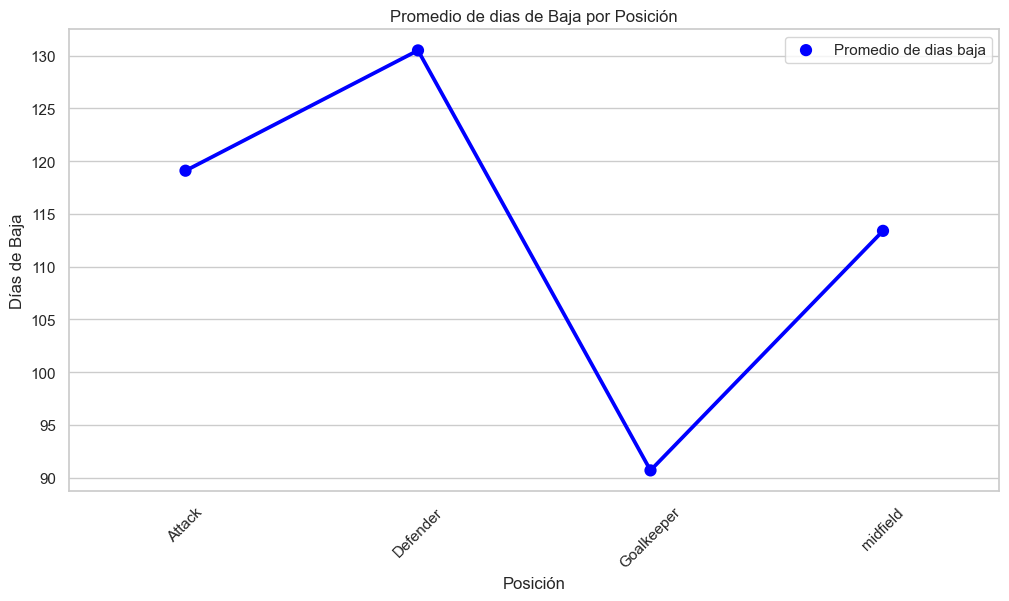

In [5]:
# normalizo los nombres de las posiciones (para que no queden subposiciones)
df['Posicion']= df['Posicion'].str.extract(r'^\s*([^\s-]+)')

# guardo en un df, agrupado por posicion, el promedio de dias de baja por lesion, 
# redondeo a un lugar despues de la coma, y reseteo indice
df_lesiones = df.groupby('Posicion')['Dias De baja por Lesion'].agg(Media='mean').round(1).reset_index()

# Renombrar las nuevas columnas según tus preferencias
df_lesiones.columns = ['Posicion', 'Promedios de Dias de baja']
df_lesiones.head(2)

# Paso estilo de seaborn
sns.set(style="whitegrid")

# Creo el grafico
plt.figure(figsize=(12, 6))

#paso los parametros par la creacion 
pointplot = sns.pointplot(x='Posicion', y='Promedios de Dias de baja',
                          data=df_lesiones, color='blue', label='Promedio de dias baja')


# Añado nombres de etiquetas 
plt.xlabel('Posición')
plt.ylabel('Días de Baja')
plt.title('Promedio de dias de Baja por Posición')
plt.legend()

# roto los nombres a 45 grados para evitar superposicion.
plt.xticks(rotation=45)

# guardo en pdf
plt.savefig("../PDF_GRAFICOS/1-Seaborn-PointPlot.pdf", dpi=300)

# Mostrar el gráfico
plt.show()


Conclusion --> la posicion que el promedio de baja, fueron los defensores.

Grafico Scatterplot

Este grafico ScatterPlot, de dispersion, se eligen las variablas de posiciones, filtrando solo por arquero
y se analizan la cantidad de apariciones de los mismo por edad.

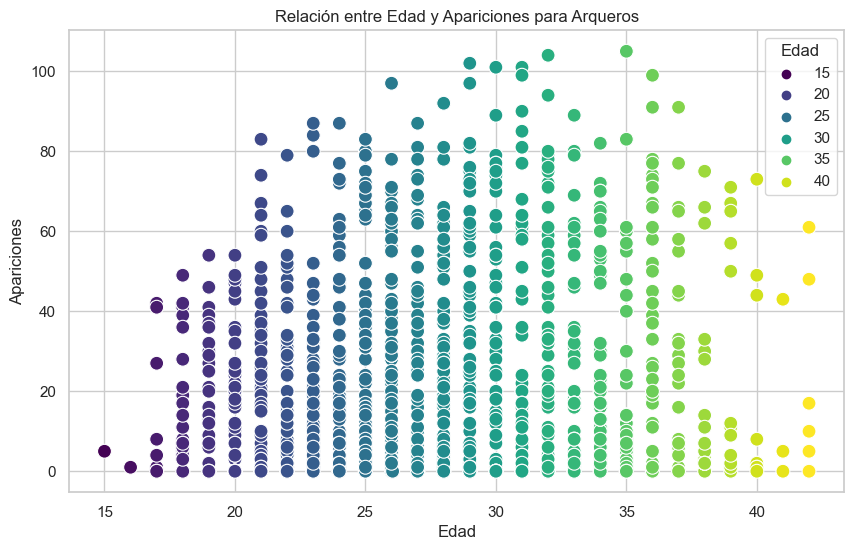

In [88]:
# Creo un DataFrame solamente con los arqueros
arqueros = df[df['Posicion'] == 'Goalkeeper']

# Guardo en ese DataFrame el equipo, nombre del jugador, edad y apariciones.
arquero = arqueros[['Equipo', 'Nombre', 'Edad', 'Apariciones']]

# Creación del gráfico, tamaño y parámetros.
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='Edad', y='Apariciones', data=arquero, hue='Edad', palette='viridis', s=100)

# Nombres de las etiquetas del grafico
scatter_plot.set_xlabel('Edad')
scatter_plot.set_ylabel('Apariciones')
scatter_plot.set_title('Relación entre Edad y Apariciones para Arqueros')

# Guardar el gráfico en un archivo PDF
plt.savefig("../PDF_GRAFICOS/2-Seaborn-scatterplot.pdf", dpi=300)

# Muestro el grafico
plt.show()





In [31]:
# None para desactivar, 'warn' para reactivar
pd.options.mode.chained_assignment = None 

Grafico LinePlot

Grafico LinePlot que  va a analizar los jugadores , que vas variacion tuvieeron del precio maximo de su pase
con el valor actual del mismo.

Al tener dos lineas, se elige pintar la zona entre ambas, para ver y dimensionar el tamaño de variacion.

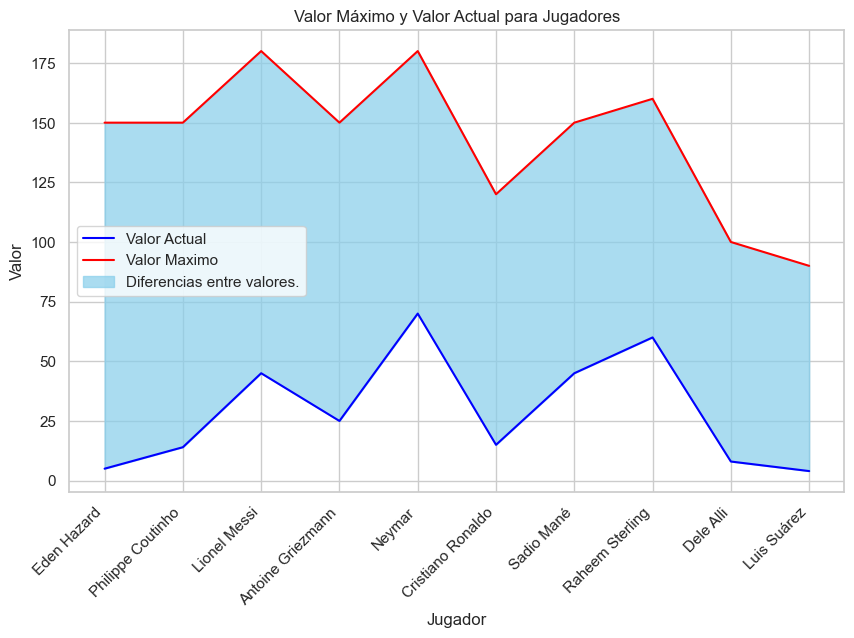

In [89]:
# limpio los nombres de las posiciones
df['Posicion']= df['Posicion'].str.extract(r'^\s*([^\s-]+)')

# tomo las columnas a usar
cotizaciones= df[['Equipo','Nombre','Valor Actual','Valor Maximo','Edad','Posicion']]

# modifico como se muestran los valores en millones 
cotizaciones['Valor Actual']=cotizaciones['Valor Actual']/1000000
cotizaciones['Valor Maximo']=cotizaciones['Valor Maximo']/1000000

# calculo la diferencia del valor de los pases de los jugadores
cotizaciones['Variaciones en Millones de USD'] = (cotizaciones['Valor Actual'] - cotizaciones['Valor Maximo'])

# ordeno por los jugadores que mas se devaluaron
cotizaciones=cotizaciones.sort_values(by='Variaciones en Millones de USD', ascending=True).head(10)

# reseteo indices
cotizaciones=cotizaciones.reset_index(drop=True)

# tamaño y creacion de grafico
plt.figure(figsize=(10, 6))

# creacion del grafico, y paso valores.
sns.lineplot(x='Nombre', y='Valor Actual', data=cotizaciones, color="blue", label='Valor Actual')
sns.lineplot(x='Nombre', y='Valor Maximo', data=cotizaciones, color="red",  label='Valor Maximo')

# Relleno las areas entre valor maximo y actual
plt.fill_between(cotizaciones['Nombre'], cotizaciones['Valor Actual'], cotizaciones['Valor Maximo'], 
                 color='skyblue', alpha=0.7, label='Diferencias entre valores.')

# Pongo Etiquetas y titulos
plt.title('Valor Máximo y Valor Actual para Jugadores')
plt.xlabel('Jugador')
plt.ylabel('Valor')

# lo roto a los nombres para que no se superpongan
plt.xticks(rotation=45, ha='right')

# Muestro los lablels
plt.legend()

# guardo el grafico en pdf
plt.savefig("../PDF_GRAFICOS/3-Seaborn-LinePlot.pdf", dpi=300)
# Mostrar el gráfico
plt.show()